In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import statsmodels.api as sms
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy

In [36]:
#insurance df
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\gui prj\insurance.csv")
df.head(10)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
8,37,male,29.8,2,no,northeast,6406.41
9,60,female,25.8,0,no,northwest,28923.14


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isna().values.any()

False

In [75]:
df.isna().apply(pd.value_counts)

,age,sex,bmi,children,smoker,region,expenses
False,1338,1338,1338,1338,1338,1338,1338


In [11]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [13]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


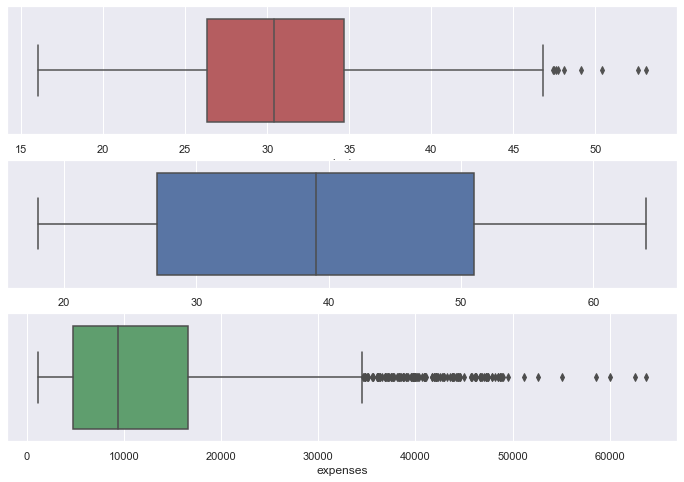

In [92]:
# determine outliers and the quartiles

plt.figure(figsize=(12,8))
plt.subplot(3,1,1)
sns.boxplot(df.bmi, color='r')

plt.subplot(3,1,2)
sns.boxplot(df.age, color='b')

plt.subplot(3,1,3)
sns.boxplot(df.expenses, color='g')
plt.show()

In [70]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


In [64]:
df.age.mean()

39.20702541106129

In [88]:
male_female_avg_expenses = (df.expenses[df.sex == 'male'].mean(),df.expenses[df.sex == 'female'].mean() )
print(male_female_avg_expenses)

(13956.751420118353, 12569.578897280966)


In [78]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


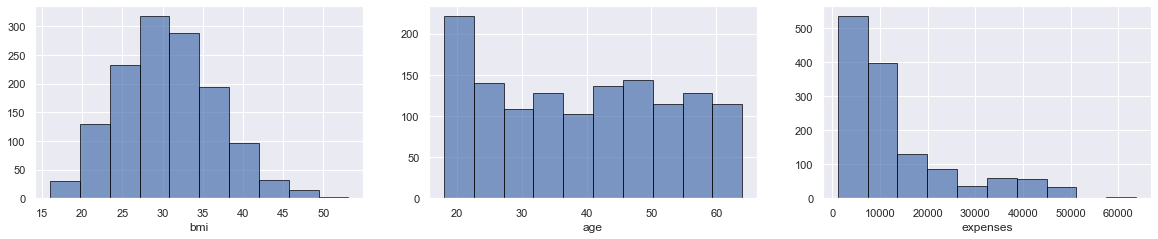

In [115]:
plt.figure(figsize=(20,12))

plt.subplot(3,3,1)
plt.hist(df.bmi, edgecolor='black', alpha=0.7)
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(df.age, edgecolor='black', alpha=0.7)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(df.expenses, edgecolor='black', alpha=0.7)
plt.xlabel('expenses')

plt.show()


In [105]:
Skewness = pd.DataFrame({'Skewness': [stats.skew(df.bmi), stats.skew(df.age), stats.skew(df.expenses)]})
Skewness

,Skewness
0,0.284274
1,0.055610
2,1.514180


<BarContainer object of 6 artists>

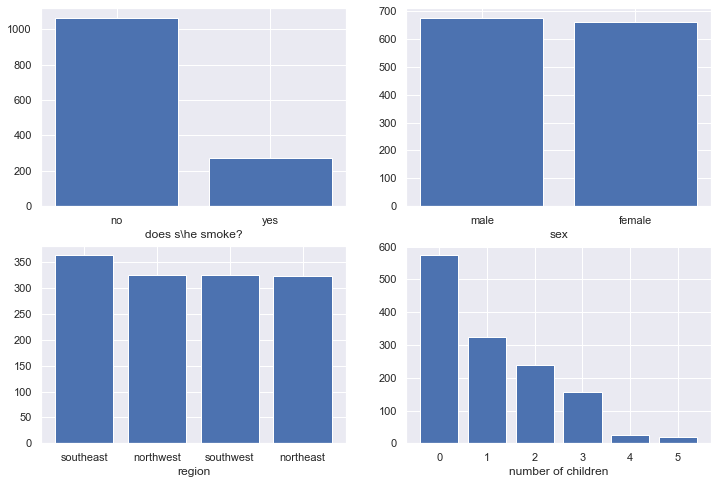

In [141]:
plt.figure(figsize=(12,8))

x = df.smoker.value_counts().index
y = [df.smoker.value_counts()[i] for i in x]
plt.subplot(2,2,1)
plt.xlabel('does s\he smoke?')
plt.bar(x,y)

x1 = df.sex.value_counts().index
y1 = [df.sex.value_counts()[i] for i in x1]
plt.subplot(2,2,2)
plt.xlabel('sex')
plt.bar(x1,y1)

x2 = df.region.value_counts().index
y2 = [df.region.value_counts()[i] for i in x2]
plt.subplot(2,2,3)
plt.xlabel('region')
plt.bar(x2,y2)


x3 = df.children.value_counts().index
y3 = [df.children.value_counts()[i] for i in x3]
plt.subplot(2,2,4)
plt.xlabel('number of children')
plt.bar(x3,y3)



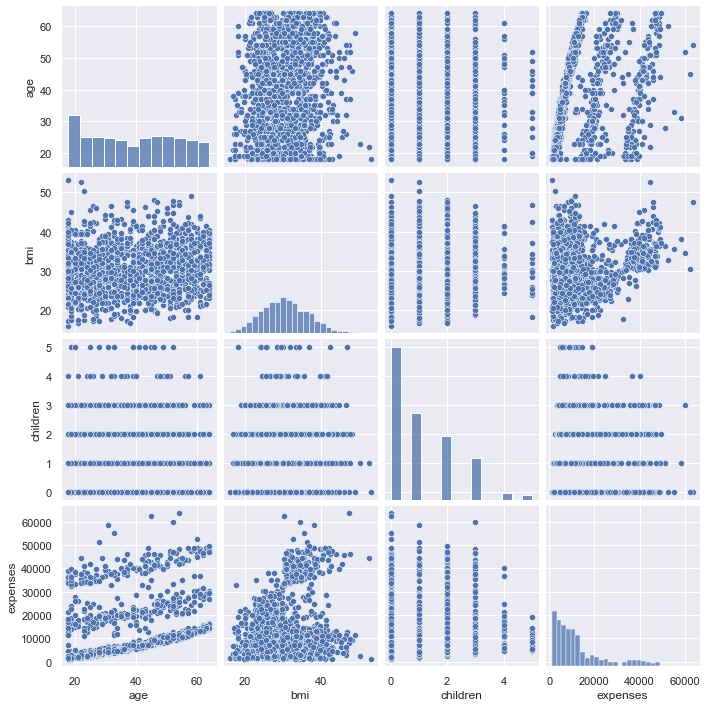

In [144]:
df_encoded = copy.deepcopy(df)
df_encoded.loc[:, ['sex', 'smoker', 'region']]
sns.pairplot(df_encoded)

### Analyzing Trends and Patterns in the Dataset

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


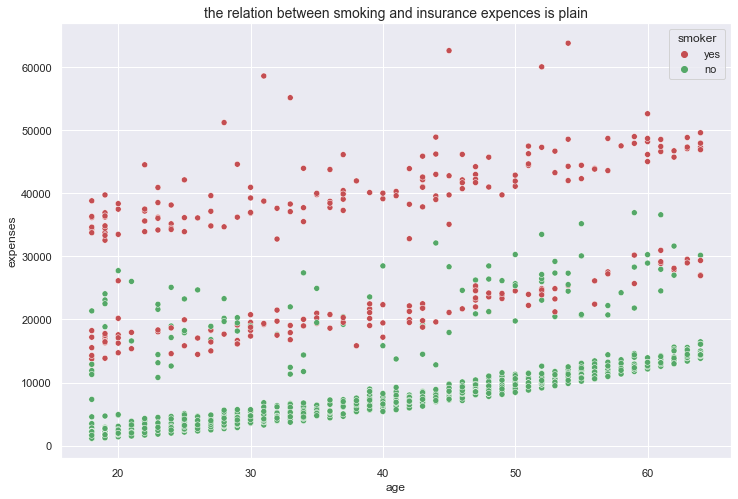

In [154]:
# Do the expenses of people who smoke differ significantly than who do not?

plt.figure(figsize=(12,8))
sns.scatterplot(df.age, df.expenses, hue=df.smoker, palette=['r', 'g'])
plt.title('the relation between smoking and insurance expences is plain', fontsize=14);

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


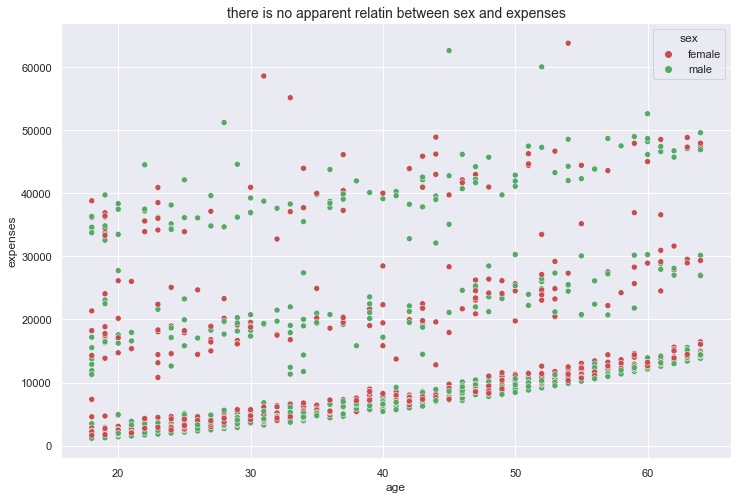

In [156]:
plt.figure(figsize=(12,8))
sns.scatterplot(df.age, df.expenses, hue=df.sex, palette=['r', 'g'])
plt.title('there is no apparent relatin between sex and expenses', fontsize=14);

In [185]:
# Performing T test
smoker = np.array(df[df.smoker == 'yes'].expenses)
non_smoker = np.array(df[df.smoker == 'no'].expenses)

t, p_value = stats.ttest_ind(smoker, non_smoker, axis=0)
if p_value > 0.05:
    print(f"the expenses of smoker and non_smokers are similar since the p_value ({p_value}) > 0.05")
elif p_value < 0.05:
    print(f"the expenses of smoker and non_smokers are not similar since the p_value ({p_value}) < 0.05")
    

the expenses of smoker and non_smokers are not similar since the p_value (8.271449574495316e-283) < 0.05


In [186]:
# comparing the bmi's with respect to sex

male = np.array(df[df.sex == 'male'].bmi)
female = np.array(df[df.sex == 'female'].bmi)

t, p_value = stats.ttest_ind(male, female, axis=0)
if p_value > 0.05:
    print(f"gender has no effect on bmi as the p_value ({p_value}) > 0.05")
elif p_value < 0.05:
    print(f"gender has an effect on bmi since the p_value ({p_value}) < 0.05")

gender has no effect on bmi as the p_value (0.08991356987176295) > 0.05


In [187]:
crosstab= pd.crosstab(df.sex, df.smoker)
crosstab

smoker,no,yes
sex,,
female,547,115
male,517,159


In [184]:
# the ratio of male smokers to female smokers

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)
if p_value > 0.05:
    print(f"gender has no effect on the smoke use since the p_value ({p_value}) > 0.05")
elif p_value < 0.05:
    print(f"gender has an effect on the smoke use as the p_value ({p_value}) < 0.05")


gender has an effect on the smoke use as the p_value (0.006548143503580696) < 0.05
